In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

from utils.utils import XyScaler
%matplotlib inline

/Users/distantbeliefs/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('merged_data.csv')
data = data.dropna()
data.head()

,Unnamed: 0,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,...,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
0,0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,...,95.70,5.12,19410,333,514,1.715611,2.648120,8.5,12.8,20304
1,1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,...,91.34,5.27,69724,925,1429,1.326659,2.049509,8.6,13.8,73058
2,2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,...,91.34,5.27,11567,82,127,0.708913,1.097951,14.2,24.1,9145
3,3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,...,91.86,5.62,9508,119,184,1.251578,1.935212,10.9,17.0,7078
4,4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,...,91.86,5.62,21368,601,928,2.812617,4.342943,9.3,17.3,20934


In [4]:
pd.set_option("display.max_columns", 50)
data.corr()


,Unnamed: 0,county_code,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,Med_AMAT_fac,Med_MH_fac,Med_SA_fac,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SA_fac,SMAT_fac,TMAT_fac,drugdeathrate,drugdeathrate_est,drugdeaths,mme_percap,partD30dayrxrate,pctunins,num_SSPs,bup_phys,drugdep,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
Unnamed: 0,1.000000,0.996223,NaN,-0.033491,-0.055686,-0.041048,-0.093155,-0.053485,-0.025535,-0.044799,-0.032274,-0.010731,-0.004987,-0.050718,-0.056035,-0.081344,-0.043281,-0.040503,0.002466,0.026464,-0.046807,-0.018619,-0.051768,0.011522,-0.024083,-0.041576,-0.193113,0.074893,-0.142508,-0.057922,-0.054789,-0.054788,-0.014858,-0.014749,-0.185951,-0.098926,-0.053751
county_code,0.996223,1.000000,NaN,-0.033893,-0.053270,-0.038341,-0.087723,-0.053694,-0.027703,-0.044604,-0.030692,-0.009651,-0.004358,-0.047947,-0.056217,-0.081081,-0.042660,-0.040126,0.003446,0.021144,-0.046582,-0.020324,-0.054209,0.005083,-0.027446,-0.040674,-0.193043,0.062764,-0.166287,-0.058086,-0.055031,-0.055030,-0.012414,-0.012321,-0.186364,-0.102965,-0.053454
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMAT_fac,-0.033491,-0.033893,NaN,1.000000,0.595513,0.143392,0.319701,0.693475,0.905213,0.680511,0.701584,0.689784,0.695872,0.620961,0.658636,0.716374,0.752138,0.774309,0.284524,0.089120,0.693021,-0.012223,0.023985,-0.066099,0.473234,0.726229,0.157613,0.000855,-0.009146,0.666668,0.674728,0.674728,0.368826,0.368799,0.044985,-0.046531,0.677861
HIVdiagnoses,-0.055686,-0.053270,NaN,0.595513,1.000000,0.265064,0.434472,0.742972,0.463044,0.711500,0.687870,0.587052,0.531555,0.953568,0.892378,0.788546,0.729880,0.698341,0.182457,0.021993,0.737373,-0.060404,0.022127,0.057834,0.454877,0.788263,0.087915,0.094609,-0.023618,0.889872,0.905813,0.905813,0.385908,0.385882,0.069481,0.013178,0.888404
HIVincidence,-0.041048,-0.038341,NaN,0.143392,0.265064,1.000000,0.426622,0.176980,0.113432,0.177785,0.171183,0.144381,0.138260,0.219355,0.181738,0.161713,0.169334,0.162073,0.108772,0.006157,0.191322,0.039911,0.085999,0.067559,0.142204,0.192547,0.119346,0.046530,0.063893,0.179931,0.166901,0.166899,0.204590,0.204485,0.137300,0.092366,0.188200
HIVprevalence,-0.093155,-0.087723,NaN,0.319701,0.434472,0.426622,1.000000,0.359265,0.284200,0.365535,0.372567,0.370606,0.352073,0.495454,0.313541,0.320477,0.378790,0.357931,0.178183,-0.022288,0.343997,-0.007855,0.059902,0.182255,0.283613,0.408040,0.336935,0.159853,0.147677,0.314022,0.335733,0.335734,0.353319,0.353410,0.345252,0.293603,0.330046
MH_fac,-0.053485,-0.053694,NaN,0.693475,0.742972,0.176980,0.359265,1.000000,0.612965,0.991463,0.892375,0.826232,0.774505,0.772831,0.847066,0.884296,0.887893,0.863894,0.353741,0.057784,0.847282,-0.005343,0.047604,-0.092715,0.582030,0.877725,0.166348,0.012280,-0.025637,0.854901,0.823261,0.823261,0.409500,0.409453,0.056155,-0.057334,0.872682
Med_AMAT_fac,-0.025535,-0.027703,NaN,0.905213,0.463044,0.113432,0.284200,0.612965,1.000000,0.605883,0.640605,0.678279,0.712439,0.518333,0.547848,0.600986,0.674796,0.698783,0.241357,0.079567,0.595490,-0.022519,-0.003365,-0.081706,0.440531,0.645853,0.158371,-0.005617,-0.013124,0.555356,0.571294,0.571295,0.340133,0.340114,0.038076,-0.048806,0.563463
Med_MH_fac,-0.044799,-0.044604,NaN,0.680511,0.711500,0.177785,0.365535,0.991463,0.605883,1.000000,0.903238,0.841345,0.791415,0.747979,0.805628,0.854618,0.877582,0.850028,0.360031,0.055365,0.831369,-0.003236,0.048599,-0.100051,0.571415,0.862380,0.168963,0.011056,-0.028616,0.812683,0.779155,0.779155,0.409748,0.409699,0.053107,-0.058465,0.835783


In [8]:
y = data['HIVprevalence']
columns_to_drop = ['AMAT_fac', 'MH_fac', 'Med_AMAT_fac', 'Med_MH_fac', 'Med_SA_fac', 'SA_fac', 'TMAT_fac', 'drugdeathrate', 
                   'partD30dayrxrate', 'num_SSPs', 'nonmedpain', 'ADULTMEN', '%msm5yr','Unnamed: 0','county_code','COUNTY','STATEABBREVIATION','YEAR']

X = data.drop(columns = columns_to_drop , axis = 1)
X

,HIVdiagnoses,HIVincidence,HIVprevalence,Med_SMAT_fac,Med_TMAT_fac,PLHIV,Population,SMAT_fac,drugdeathrate_est,drugdeaths,mme_percap,pctunins,bup_phys,drugdep,pctunmetneed,MSM12MTH,MSM5YEAR,%msm12month,unemployment_rate,poverty_rate,household_income
0,5.0,10.9,225.5,0.0,0.0,103.0,55035.0,0.0,10.1,0.0,1084.0,10.1,2.0,2.56,95.70,333,514,1.715611,8.5,12.8,20304
1,15.0,8.7,163.9,0.0,0.0,282.0,203690.0,0.0,20.1,43.0,1148.5,13.0,13.0,2.54,91.34,925,1429,1.326659,8.6,13.8,73058
2,0.0,0.0,436.0,0.0,0.0,97.0,26270.0,0.0,6.1,0.0,577.6,15.5,0.0,2.54,91.34,82,127,0.708913,14.2,24.1,9145
3,0.0,0.0,191.9,1.0,0.0,37.0,22561.0,1.0,14.1,0.0,563.0,9.7,0.0,2.58,91.86,119,184,1.251578,10.9,17.0,7078
4,5.0,10.4,95.4,0.0,0.0,46.0,57676.0,0.0,16.1,11.0,459.0,11.6,1.0,2.58,91.86,601,928,2.812617,9.3,17.3,20934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,0.0,0.0,86.5,1.0,0.0,31.0,44693.0,1.0,18.1,0.0,1044.8,13.5,2.0,2.08,87.02,177,274,1.044803,5.6,12.2,16687
3136,0.0,0.0,50.5,0.0,0.0,10.0,23073.0,0.0,8.1,0.0,387.8,16.9,2.0,2.03,89.16,50,78,0.545137,3.6,8.5,7873
3137,0.0,0.0,0.0,0.0,0.0,0.0,20819.0,0.0,18.1,0.0,1067.8,14.0,2.0,2.08,87.02,75,116,1.013377,5.8,14.2,7557
3138,0.0,0.0,0.0,0.0,0.0,0.0,8334.0,0.0,16.1,0.0,1444.0,16.9,0.0,2.09,86.12,17,27,0.541229,7.9,14.2,3461


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=154, shuffle=True)

In [10]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train.iloc[:,5:], y_train)

Ridge(alpha=0.5)

In [11]:
def rss(y, y_hat):
    return np.mean((y  - y_hat)**2)

In [12]:
preds = ridge.predict(X_test.iloc[:,5:])
mse = rss(y_test, preds)
print("MSE for Ridge(alpha=0.5): {:2.2f}".format(mse))

MSE for Ridge(alpha=0.5): 23152.16


In [13]:
def cv(X, y, base_estimator, n_folds, random_seed=154, *args, **kwargs):
    """Estimate the in and out-of-sample error of a model using cross validation.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    base_estimator: sklearn model object.
      The estimator to fit.  Must have fit and predict methods.
      
    n_folds: int
      The number of folds in the cross validation.
      
    random_seed: int
      A seed for the random number generator, for repeatability.
    
    Returns
    -------
      
    train_cv_errors, test_cv_errors: tuple of arrays
      The training and testing errors for each fold of cross validation.
    """
    kf = KFold(n_splits=n_folds, shuffle = True, random_state=random_seed)
    test_cv_errors, train_cv_errors = np.empty(n_folds), np.empty(n_folds)
    for idx, (train_ind, test_ind) in enumerate(kf.split(X_train)):
        # Split into train and test
        X_cv_train, y_cv_train = X[train_ind], y[train_ind]
        X_cv_test, y_cv_test = X[test_ind], y[test_ind]
        # Standardize data.
        standardizer = XyScaler()
        standardizer.fit(X_cv_train, y_cv_train)
        X_cv_train_std, y_cv_train_std = standardizer.transform(X_cv_train, y_cv_train)
        X_cv_test_std, y_cv_test_std = standardizer.transform(X_cv_test, y_cv_test)
        # Fit estimator
        estimator = base_estimator#(**kwargs)
        estimator.fit(X_cv_train_std, y_cv_train_std)
        # Measure performance
        y_hat_train = estimator.predict(X_cv_train_std)
        y_hat_test = estimator.predict(X_cv_test_std)
        # Calclate the error metrics
        train_cv_errors[idx] = rss(y_cv_train_std, y_hat_train)
        test_cv_errors[idx] = rss(y_cv_test_std, y_hat_test)
    return train_cv_errors, test_cv_errors

In [14]:
n_folds = 10
train_cv_errors, test_cv_errors = cv(X_train.iloc[:,5:].values, y_train.values, 
                                     Ridge(alpha=0.5), n_folds=n_folds)

In [15]:
print("Training CV error: {:2.2f}".format(train_cv_errors.mean()))
print("Test CV error: {:2.2f}".format(test_cv_errors.mean()))
print("as expected")

Training CV error: 0.45
Test CV error: 0.48
as expected


In [16]:
def train_at_various_alphas(X, y, model, alphas, n_folds=10, **kwargs):
    """Train a regularized regression model using cross validation at various values of alpha.
    
    Parameters
    ----------
    
    X: np.array
      Matrix of predictors.
      
    y: np.array
      Target array.
      
    model: sklearn model class
      A class in sklearn that can be used to create a regularized regression object.  Options are `Ridge` and `Lasso`.
      
    alphas: numpy array
      An array of regularization parameters.
      
    n_folds: int
      Number of cross validation folds.
      
    Returns
    -------
    
    cv_errors_train, cv_errors_test: tuple of DataFrame
      DataFrames containing the training and testing errors for each value of 
      alpha and each cross validation fold.  Each row represents a CV fold,
      and each column a value of alpha.
    """
    cv_errors_train = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                     columns=alphas)
    cv_errors_test = pd.DataFrame(np.empty(shape=(n_folds, len(alphas))),
                                        columns=alphas)
    for alpha in alphas:
        train_fold_errors, test_fold_errors = cv(X, y, model(alpha=alpha, **kwargs), n_folds=n_folds)
        cv_errors_train.loc[:, alpha] = train_fold_errors
        cv_errors_test.loc[:, alpha] = test_fold_errors
    return cv_errors_train, cv_errors_test

In [17]:
ridge_alphas = np.logspace(-2, 4, num=250)

ridge_cv_errors_train, ridge_cv_errors_test = train_at_various_alphas(
    X_train.iloc[:,5:].values, y_train.values, Ridge, ridge_alphas)

In [18]:
ridge_cv_errors_train

,0.010000,0.010571,0.011174,0.011811,0.012485,0.013197,0.013950,0.014746,0.015587,0.016477,0.017417,0.018410,0.019461,0.020571,0.021744,0.022985,0.024296,0.025683,0.027148,0.028697,0.030334,0.032064,0.033894,0.035828,0.037872,...,2640.503497,2791.149716,2950.390616,3118.716540,3296.645809,3484.726313,3683.537201,3893.690664,4115.833819,4350.650703,4598.864379,4861.239162,5138.582973,5431.749825,5741.642456,6069.215106,6415.476458,6781.492741,7168.391014,7577.362639,8009.666946,8466.635113,8949.674265,9460.271807,10000.000000
0,0.477571,0.477571,0.477571,0.477571,0.477571,0.477571,0.477571,0.477571,0.477572,0.477572,0.477572,0.477572,0.477572,0.477572,0.477572,0.477572,0.477572,0.477572,0.477572,0.477572,0.477572,0.477572,0.477572,0.477572,0.477572,...,0.659832,0.664647,0.669512,0.674428,0.679390,0.684398,0.689450,0.694542,0.699673,0.704840,0.710041,0.715272,0.720531,0.725815,0.731121,0.736446,0.741786,0.747139,0.752502,0.757870,0.763241,0.768612,0.773978,0.779336,0.784683
1,0.432702,0.432702,0.432702,0.432702,0.432702,0.432702,0.432702,0.432702,0.432702,0.432702,0.432702,0.432702,0.432702,0.432702,0.432702,0.432702,0.432702,0.432702,0.432702,0.432702,0.432702,0.432702,0.432702,0.432702,0.432702,...,0.595683,0.600783,0.605947,0.611173,0.616459,0.621803,0.627201,0.632654,0.638158,0.643711,0.649311,0.654957,0.660646,0.666377,0.672146,0.677953,0.683795,0.689670,0.695576,0.701510,0.707470,0.713452,0.719456,0.725477,0.731512
2,0.454626,0.454626,0.454626,0.454626,0.454626,0.454626,0.454626,0.454626,0.454626,0.454626,0.454626,0.454626,0.454626,0.454626,0.454626,0.454626,0.454626,0.454626,0.454626,0.454626,0.454626,0.454626,0.454626,0.454626,0.454626,...,0.635598,0.640559,0.645575,0.650645,0.655764,0.660933,0.666148,0.671406,0.676706,0.682045,0.687420,0.692829,0.698269,0.703738,0.709233,0.714750,0.720288,0.725844,0.731415,0.736997,0.742589,0.748187,0.753788,0.759388,0.764986
3,0.468922,0.468922,0.468922,0.468922,0.468922,0.468922,0.468922,0.468922,0.468922,0.468922,0.468922,0.468922,0.468922,0.468922,0.468922,0.468922,0.468922,0.468922,0.468922,0.468922,0.468922,0.468922,0.468922,0.468922,0.468922,...,0.640816,0.645656,0.650562,0.655531,0.660559,0.665644,0.670782,0.675971,0.681207,0.686487,0.691808,0.697166,0.702558,0.707980,0.713431,0.718905,0.724400,0.729913,0.735440,0.740978,0.746524,0.752075,0.757627,0.763177,0.768721
4,0.441726,0.441726,0.441726,0.441726,0.441726,0.441726,0.441726,0.441726,0.441726,0.441726,0.441726,0.441726,0.441726,0.441726,0.441726,0.441726,0.441726,0.441726,0.441726,0.441726,0.441726,0.441726,0.441726,0.441726,0.441726,...,0.625466,0.630521,0.635635,0.640804,0.646027,0.651301,0.656624,0.661993,0.667405,0.672857,0.678347,0.683873,0.689430,0.695018,0.700632,0.706270,0.711929,0.717607,0.723300,0.729006,0.734721,0.740444,0.746170,0.751897,0.757622
5,0.436741,0.436741,0.436741,0.436741,0.436741,0.436741,0.436741,0.436741,0.436741,0.436741,0.436741,0.436741,0.436741,0.436741,0.436741,0.436741,0.436741,0.436741,0.436741,0.436741,0.436741,0.436741,0.436742,0.436742,0.436742,...,0.620298,0.625445,0.630648,0.635906,0.641216,0.646575,0.651982,0.657433,0.662926,0.668458,0.674027,0.679630,0.685265,0.690929,0.696618,0.702331,0.708066,0.713818,0.719586,0.725366,0.731156,0.736953,0.742754,0.748557,0.754356
6,0.440281,0.440281,0.440281,0.440281,0.440281,0.440281,0.440281,0.440281,0.440281,0.440281,0.440281,0.440281,0.440281,0.440281,0.440281,0.440281,0.440281,0.440281,0.440282,0.440282,0.440282,0.440282,0.440282,0.440282,0.440282,...,0.620003,0.625070,0.630196,0.635380,0.640619,0.645912,0.651255,0.656646,0.662083,0.667563,0.673084,0.678643,0.684238,0.689866,0.695524,0.701209,0.706919,0.712651,0.718402,0.724170,0.729950,0.735741,0.741539,0.747341,0.753143
7,0.437747,0.437747,0.437747,0.437747,0.437747,0.437747,0.437747,0.437747,0.437747,0.437747,0.437747,0.437747,0.437747,0.437747,0.437747,0.437747,0.437747,0.437747,0.437747,0.437747,0.437747,0.437747,0.437747,0.437747,0.437747,...,0.622333,0.627426,0.632574,0.637776,0.643029,0

In [19]:
ridge_cv_errors_test

,0.010000,0.010571,0.011174,0.011811,0.012485,0.013197,0.013950,0.014746,0.015587,0.016477,0.017417,0.018410,0.019461,0.020571,0.021744,0.022985,0.024296,0.025683,0.027148,0.028697,0.030334,0.032064,0.033894,0.035828,0.037872,...,2640.503497,2791.149716,2950.390616,3118.716540,3296.645809,3484.726313,3683.537201,3893.690664,4115.833819,4350.650703,4598.864379,4861.239162,5138.582973,5431.749825,5741.642456,6069.215106,6415.476458,6781.492741,7168.391014,7577.362639,8009.666946,8466.635113,8949.674265,9460.271807,10000.000000
0,0.804540,0.804537,0.804534,0.804531,0.804528,0.804525,0.804521,0.804518,0.804514,0.804510,0.804505,0.804501,0.804496,0.804491,0.804485,0.804480,0.804474,0.804467,0.804461,0.804454,0.804446,0.804438,0.804430,0.804421,0.804412,...,1.286127,1.300803,1.315529,1.330303,1.345120,1.359977,1.374870,1.389798,1.404757,1.419746,1.434762,1.449804,1.464868,1.479955,1.495061,1.510185,1.525325,1.540477,1.555641,1.570812,1.585987,1.601163,1.616334,1.631497,1.646645
1,0.613562,0.613564,0.613566,0.613569,0.613572,0.613575,0.613578,0.613581,0.613584,0.613588,0.613592,0.613596,0.613600,0.613604,0.613609,0.613614,0.613619,0.613625,0.613631,0.613637,0.613643,0.613650,0.613658,0.613665,0.613673,...,0.873793,0.875206,0.876409,0.877400,0.878182,0.878756,0.879126,0.879298,0.879277,0.879072,0.878692,0.878148,0.877453,0.876620,0.875664,0.874602,0.873450,0.872226,0.870950,0.869641,0.868317,0.867001,0.865710,0.864466,0.863288
2,0.370068,0.370069,0.370070,0.370071,0.370073,0.370074,0.370076,0.370077,0.370079,0.370081,0.370083,0.370085,0.370087,0.370089,0.370092,0.370094,0.370097,0.370099,0.370102,0.370106,0.370109,0.370112,0.370116,0.370120,0.370124,...,0.558552,0.564221,0.569958,0.575760,0.581625,0.587548,0.593527,0.599559,0.605640,0.611766,0.617934,0.624141,0.630382,0.636653,0.642951,0.649271,0.655609,0.661961,0.668323,0.674690,0.681058,0.687422,0.693778,0.700121,0.706446
3,0.318897,0.318897,0.318897,0.318898,0.318898,0.318899,0.318899,0.318900,0.318900,0.318901,0.318902,0.318902,0.318903,0.318904,0.318905,0.318905,0.318906,0.318907,0.318908,0.318909,0.318910,0.318911,0.318913,0.318914,0.318915,...,0.627854,0.634747,0.641696,0.648702,0.655766,0.662886,0.670062,0.677295,0.684583,0.691924,0.699318,0.706761,0.714252,0.721789,0.729368,0.736985,0.744639,0.752325,0.760038,0.767776,0.775533,0.783305,0.791086,0.798872,0.806657
4,0.327749,0.327744,0.327738,0.327733,0.327727,0.327721,0.327715,0.327708,0.327700,0.327693,0.327685,0.327676,0.327667,0.327658,0.327647,0.327637,0.327626,0.327614,0.327601,0.327588,0.327574,0.327559,0.327544,0.327527,0.327510,...,0.374988,0.377636,0.380349,0.383129,0.385972,0.388879,0.391846,0.394872,0.397955,0.401091,0.404279,0.407516,0.410797,0.414121,0.417483,0.420880,0.424309,0.427766,0.431246,0.434747,0.438264,0.441793,0.445330,0.448872,0.452415
5,0.537794,0.537795,0.537796,0.537797,0.537799,0.537800,0.537801,0.537803,0.537804,0.537806,0.537808,0.537809,0.537811,0.537813,0.537816,0.537818,0.537820,0.537823,0.537825,0.537828,0.537831,0.537834,0.537838,0.537841,0.537845,...,0.685370,0.689373,0.693459,0.697625,0.701868,0.706185,0.710572,0.715027,0.719546,0.724123,0.728755,0.733438,0.738166,0.742934,0.747738,0.752572,0.757431,0.762310,0.767203,0.772105,0.777010,0.781914,0.786810,0.791694,0.796560
6,0.523594,0.523594,0.523595,0.523595,0.523595,0.523596,0.523596,0.523596,0.523597,0.523597,0.523597,0.523598,0.523598,0.523599,0.523599,0.523600,0.523600,0.523601,0.523602,0.523602,0.523603,0.523604,0.523605,0.523605,0.523606,...,0.720503,0.724952,0.729456,0.734014,0.738623,0.743280,0.747982,0.752727,0.757510,0.762329,0.767179,0.772057,0.776959,0.781881,0.786819,0.791769,0.796726,0.801687,0.806646,0.811600,0.816545,0.821476,0.826389,0.831279,0.836143
7,0.386538,0.386538,0.386538,0.386538,0.386539,0.386539,0.386539,0.386539,0.386539,0.386539,0.386539,0.386539,0.386540,0.386540,0.386540,0.386540,0.386540,0.386541,0.386541,0.386541,0.386541,0.386541,0.386542,0.386542,0.386542,...,0.452415,0.455263,0.458187,0.461183,0.464249,0

In [20]:
ridge_mean_cv_errors_train = ridge_cv_errors_train.mean(axis=0)
ridge_mean_cv_errors_test = ridge_cv_errors_test.mean(axis=0)

In [21]:
def get_optimal_alpha(mean_cv_errors_test):
    alphas = mean_cv_errors_test.index
    optimal_idx = np.argmin(mean_cv_errors_test.values)
    optimal_alpha = alphas[optimal_idx]
    return optimal_alpha

ridge_optimal_alpha = get_optimal_alpha(ridge_mean_cv_errors_test)

Text(0, 0.5, 'MSE')

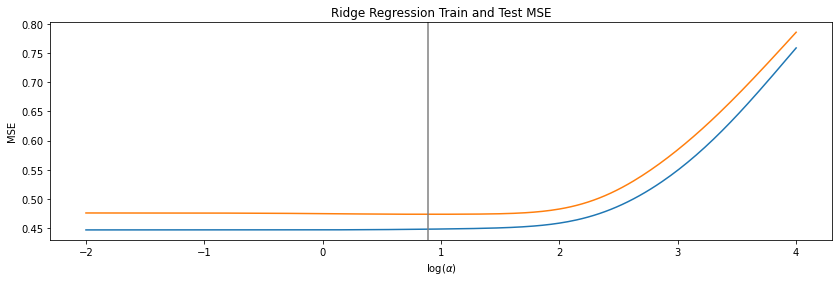

In [22]:
fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(np.log10(ridge_alphas), ridge_mean_cv_errors_train)
ax.plot(np.log10(ridge_alphas), ridge_mean_cv_errors_test)
ax.axvline(np.log10(ridge_optimal_alpha), color='grey')
ax.set_title("Ridge Regression Train and Test MSE")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("MSE")
#plt.savefig('ridge_regression_train_test_MSE.png')

In [23]:
ridge_models = []

for alpha in ridge_alphas:
    scaler = XyScaler()
    scaler.fit(X_train.iloc[:,5:].values, y_train.values)
    X_train_std, y_train_std = scaler.transform(X_train.iloc[:,5:].values, y_train.values)
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_std, y_train_std)
    ridge_models.append(ridge)

In [24]:
paths = pd.DataFrame(np.empty(shape=(len(ridge_alphas), len(X_train.iloc[:,5:].columns))),
                     index=ridge_alphas, columns=X_train.iloc[:,5:].columns)

for idx, model in enumerate(ridge_models):
    paths.iloc[idx] = model.coef_

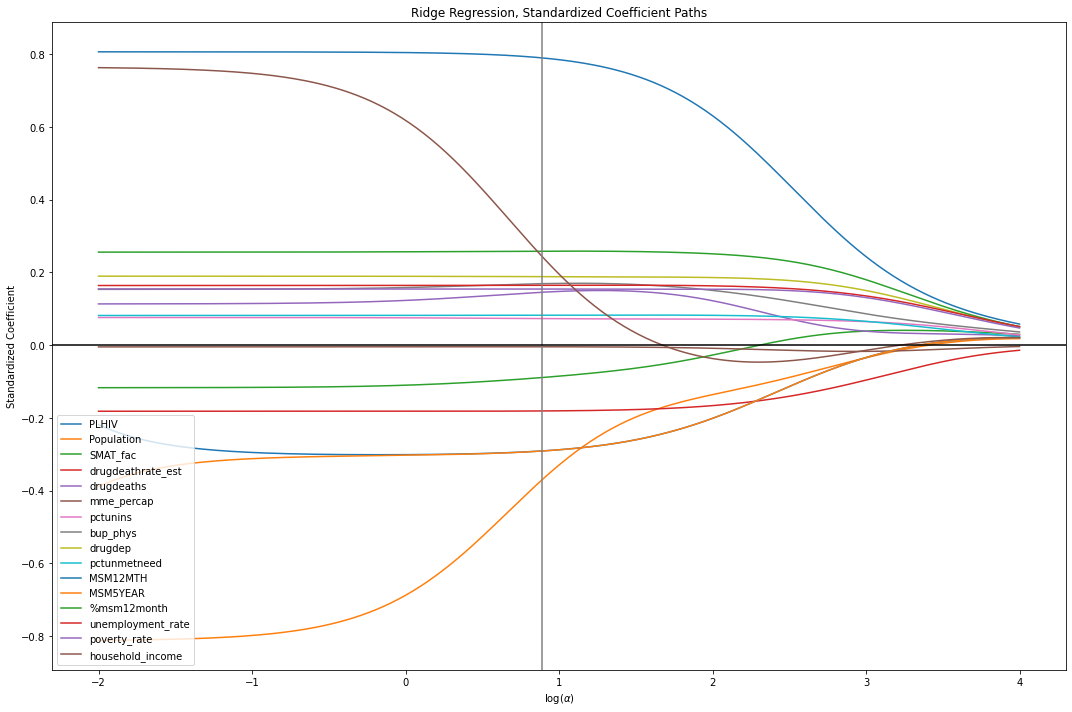

In [25]:
fig, ax = plt.subplots(figsize=(15, 10))

for column in X_train.iloc[:,5:].columns:
    path = paths.loc[:, column]
    ax.plot(np.log10(ridge_alphas), path, label=column)
ax.axvline(np.log10(ridge_optimal_alpha), color='grey')
ax.axhline(0,color = 'k')
ax.legend(loc='lower left')
ax.set_title("Ridge Regression, Standardized Coefficient Paths")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("Standardized Coefficient")
plt.tight_layout()
#plt.savefig('images/ridge_regression_standard_coefficient_paths.png')

In [26]:
df_train_coef = pd.DataFrame(paths, columns=X_train.iloc[:,5:].columns, index=np.log10(ridge_alphas))
df_train_coef

,PLHIV,Population,SMAT_fac,drugdeathrate_est,drugdeaths,mme_percap,pctunins,bup_phys,drugdep,pctunmetneed,MSM12MTH,MSM5YEAR,%msm12month,unemployment_rate,poverty_rate,household_income
-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.975904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.951807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.927711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1.903614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.903614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.927711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.951807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.975904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
print(np.log10(ridge_optimal_alpha))
#paths.iloc[226]
paths.iloc[200]

0.891566265060241


PLHIV                0.308214
Population          -0.054076
SMAT_fac             0.033609
drugdeathrate_est   -0.114253
drugdeaths           0.046573
mme_percap          -0.017129
pctunins             0.067060
bup_phys             0.098530
drugdep              0.163082
pctunmetneed         0.071058
MSM12MTH            -0.059478
MSM5YEAR            -0.059479
%msm12month          0.202153
unemployment_rate    0.144609
poverty_rate         0.140186
household_income    -0.026400
Name: 659.5946257418746, dtype: float64

In [28]:
lasso_alphas = np.logspace(-4, 1, num=250)

lasso_cv_errors_train, lasso_cv_errors_test = train_at_various_alphas(
    X_train.iloc[:,5:].values, y_train.values, Lasso, lasso_alphas, max_iter=10000)

In [29]:
lasso_cv_errors_test.shape

(10, 250)

Text(0, 0.5, 'MSE')

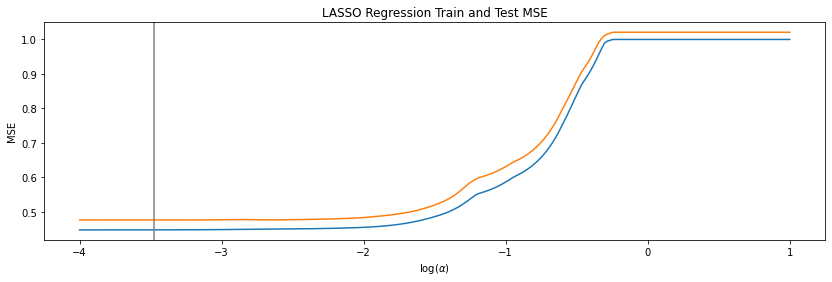

In [32]:
lasso_mean_cv_errors_train = lasso_cv_errors_train.mean(axis=0)
lasso_mean_cv_errors_test = lasso_cv_errors_test.mean(axis=0)

lasso_optimal_alpha = get_optimal_alpha(lasso_mean_cv_errors_test)
    
fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(np.log10(lasso_alphas), lasso_mean_cv_errors_train)
ax.plot(np.log10(lasso_alphas), lasso_mean_cv_errors_test)
ax.axvline(np.log10(lasso_optimal_alpha), color='grey')
ax.set_title("LASSO Regression Train and Test MSE")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("MSE")
#plt.savefig('images/LASSO_regression_train_and_test_MSE.png')

In [33]:
lasso_models = []

for alpha in lasso_alphas:
    scaler = XyScaler()
    scaler.fit(X_train.iloc[:,5:].values, y_train.values)
    X_train_std, y_train_std = scaler.transform(X_train.iloc[:,5:].values, y_train.values)
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_std, y_train_std)
    lasso_models.append(lasso)

/Users/distantbeliefs/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.20070043489534, tolerance: 0.2202
  positive)
/Users/distantbeliefs/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.822066673764652, tolerance: 0.2202
  positive)
/Users/distantbeliefs/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.536901101889384, tolerance: 0.2202
  positive)
/Users/distantbeliefs/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might

/Users/distantbeliefs/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.582784310713464, tolerance: 0.2202
  positive)
/Users/distantbeliefs/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5060752087410947, tolerance: 0.2202
  positive)
/Users/distantbeliefs/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4377300644371189, tolerance: 0.2202
  positive)
/Users/distantbeliefs/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might

Text(0, 0.5, 'Standardized Coefficient')

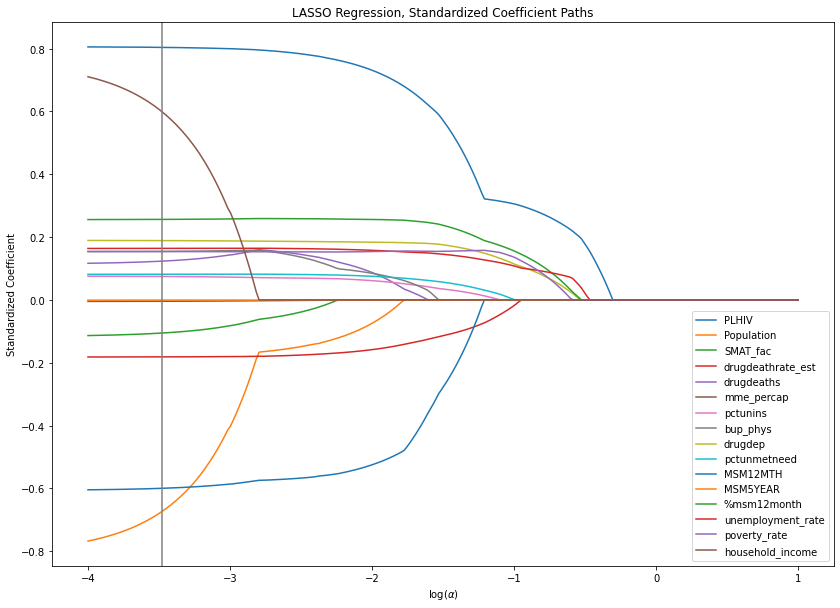

In [34]:
paths = pd.DataFrame(np.empty(shape=(len(lasso_alphas), len(X_train.iloc[:,5:].columns))),
                     index=lasso_alphas, columns=X_train.iloc[:,5:].columns)

for idx, model in enumerate(lasso_models):
    paths.iloc[idx] = model.coef_
    
fig, ax = plt.subplots(figsize=(14, 10))
for column in X_train.iloc[:,5:].columns:
    path = paths.loc[:, column]
    ax.plot(np.log10(lasso_alphas), path, label=column)
ax.axvline(np.log10(lasso_optimal_alpha), color='grey')
ax.legend(loc='lower right')
ax.set_title("LASSO Regression, Standardized Coefficient Paths")
ax.set_xlabel(r"$\log(\alpha)$")
ax.set_ylabel("Standardized Coefficient")
#plt.savefig('images/LASSO_regression_standardized_coefficient_paths.png')

In [35]:
lasso_optimal_alpha

0.00033272723685499536

In [36]:
paths.iloc[48]

PLHIV                0.800262
Population          -0.432343
SMAT_fac            -0.085004
drugdeathrate_est   -0.180696
drugdeaths           0.140935
mme_percap          -0.003530
pctunins             0.072772
bup_phys             0.156473
drugdep              0.187906
pctunmetneed         0.081765
MSM12MTH            -0.587906
MSM5YEAR            -0.000407
%msm12month          0.257631
unemployment_rate    0.164259
poverty_rate         0.153414
household_income     0.313817
Name: 0.000920143201528384, dtype: float64

In [37]:
standardizer = XyScaler()
standardizer.fit(X_train.iloc[:,5:].values, y_train.values)
X_train_std, y_train_std = standardizer.transform(X_train.iloc[:,5:].values, y_train.values)
X_test_std, y_test_std = standardizer.transform(X_test.iloc[:,5:].values, y_test.values)

In [38]:
final_ridge = Ridge(alpha=ridge_optimal_alpha).fit(X_train_std, y_train_std)
final_lasso = Lasso(alpha=lasso_optimal_alpha).fit(X_train_std, y_train_std)
final_lr = LinearRegression().fit(X_train_std, y_train_std)

/Users/distantbeliefs/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2714144624421806, tolerance: 0.2202
  positive)


In [88]:
final_ridge_rss = rss(y_test_std, final_ridge.predict(X_test_std))
final_lasso_rss = rss(y_test_std, final_lasso.predict(X_test_std))
final_lr_rss = rss(y_test_std, final_lr.predict(X_test_std))

In [89]:
print("Final Ridge RSS: {:2.3f}".format(final_ridge_rss))
print("Final Lasso RSS: {:2.3f}".format(final_lasso_rss))
print("Final Linear Regression RSS: {:2.3f}".format(final_lr_rss))

Final Ridge RSS: 0.633
Final Lasso RSS: 0.516
Final Linear Regression RSS: 0.517


In [90]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train.iloc[:,5:])
res = model.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:          HIVprevalence   R-squared (uncentered):                   0.747
Model:                            OLS   Adj. R-squared (uncentered):              0.744
Method:                 Least Squares   F-statistic:                              194.5
Date:                Fri, 05 Mar 2021   Prob (F-statistic):                        0.00
Time:                        13:27:35   Log-Likelihood:                         -13758.
No. Observations:                2202   AIC:                                  2.758e+04
Df Residuals:                    2169   BIC:                                  2.777e+04
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------